## Preface



First, install `CFEDemand` package if necessary:



In [1]:
!pip install CFEDemands --upgrade



Requirement already up-to-date: CFEDemands in /srv/app/venv/lib/python3.6/site-packages


## Compensated Policy Experiments



Compare Marshallian (uncompensated) and Hicksian (compensated)
demands:



In [2]:
from costs_preface import *

USE_GOOD = 'Rice'
#USE_GOOD = 'Milk'

U0 = r.indirect_utility(x0,p) #reference utility that average household has, with x knot and p as variables.

plt.plot([r.demands(x0,my_prices(p0,i=USE_GOOD))[USE_GOOD] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=USE_GOOD),type="Hicksian")[USE_GOOD] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(USE_GOOD)
plt.axhline(p.sel(i=USE_GOOD).values)
plt.legend(("Marshallian","Hicksian"))

#difference between the curves is income effect
#budget share will be the main characteristic to look at for income effect.

/srv/app/venv/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/srv/app/venv/lib/python3.6/site-packages/xarray/core/nputils.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


Define some useful functions for measuring costs:



In [3]:
def compensating_variation(U0,p0,p1): #diff between expenditures neccesary
    #to achieve same level of utility with new set of prices p1
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'): 
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    lecture notes:
    compensated revenue function. if it is hicksian, it is compensated. if it is marshallian,
    it is uncompensated.
    
    """
    
    dp = p1 - p0 # Change in prices

    return dp.T@r.demands(U0,p1,type=type)


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return revenue(U0,p0,p1,type='Hicksian') - cv   #hicksian revenue minus compensating variation.
#loss in efficiency due to the tax policy
    
    
def compensated_nutrient_demand(U,p,z=None):   #hicksian compensated demand 
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return compensated_nutrient_demand(U,p)/hh_rda



Text(0.5, 0, 'Price of Rice')

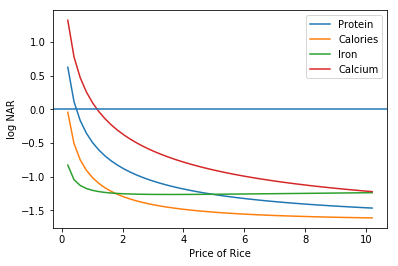

In [4]:
fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)a
ax2.set_xlabel("Price of %s" % USE_GOOD)


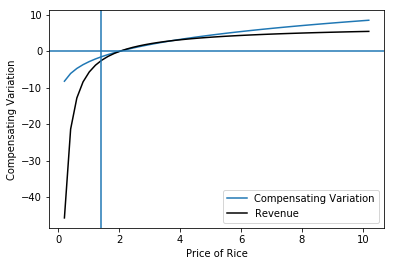

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,p,my_prices(p0)) for p0 in P])
ax1.set_xlabel("Price of %s" % USE_GOOD)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,p,my_prices(p0)) for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(p.loc[USE_GOOD])

#CV is more negative as the price gets smaller

#demand is very inelastic in that range that CV is almost the same as Revenue, ie when price is 2- 5 dollars, and the
#policy can work for this range.
